In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import joblib

In [4]:
data = pd.read_csv("NHANES_age_prediction.csv")
data = data.drop(["SEQN"], axis = 1)

In [5]:
print(data.head())

  age_group  RIDAGEYR  RIAGENDR  PAQ605  BMXBMI  LBXGLU  DIQ010  LBXGLT  LBXIN
0     Adult      61.0       2.0     2.0    35.7   110.0     2.0   150.0  14.91
1     Adult      26.0       2.0     2.0    20.3    89.0     2.0    80.0   3.85
2     Adult      16.0       1.0     2.0    23.2    89.0     2.0    68.0   6.14
3     Adult      32.0       1.0     2.0    28.9   104.0     2.0    84.0  16.15
4     Adult      38.0       2.0     1.0    35.9   103.0     2.0    81.0  10.92


In [6]:
print(data.isnull().sum())

age_group    0
RIDAGEYR     0
RIAGENDR     0
PAQ605       0
BMXBMI       0
LBXGLU       0
DIQ010       0
LBXGLT       0
LBXIN        0
dtype: int64


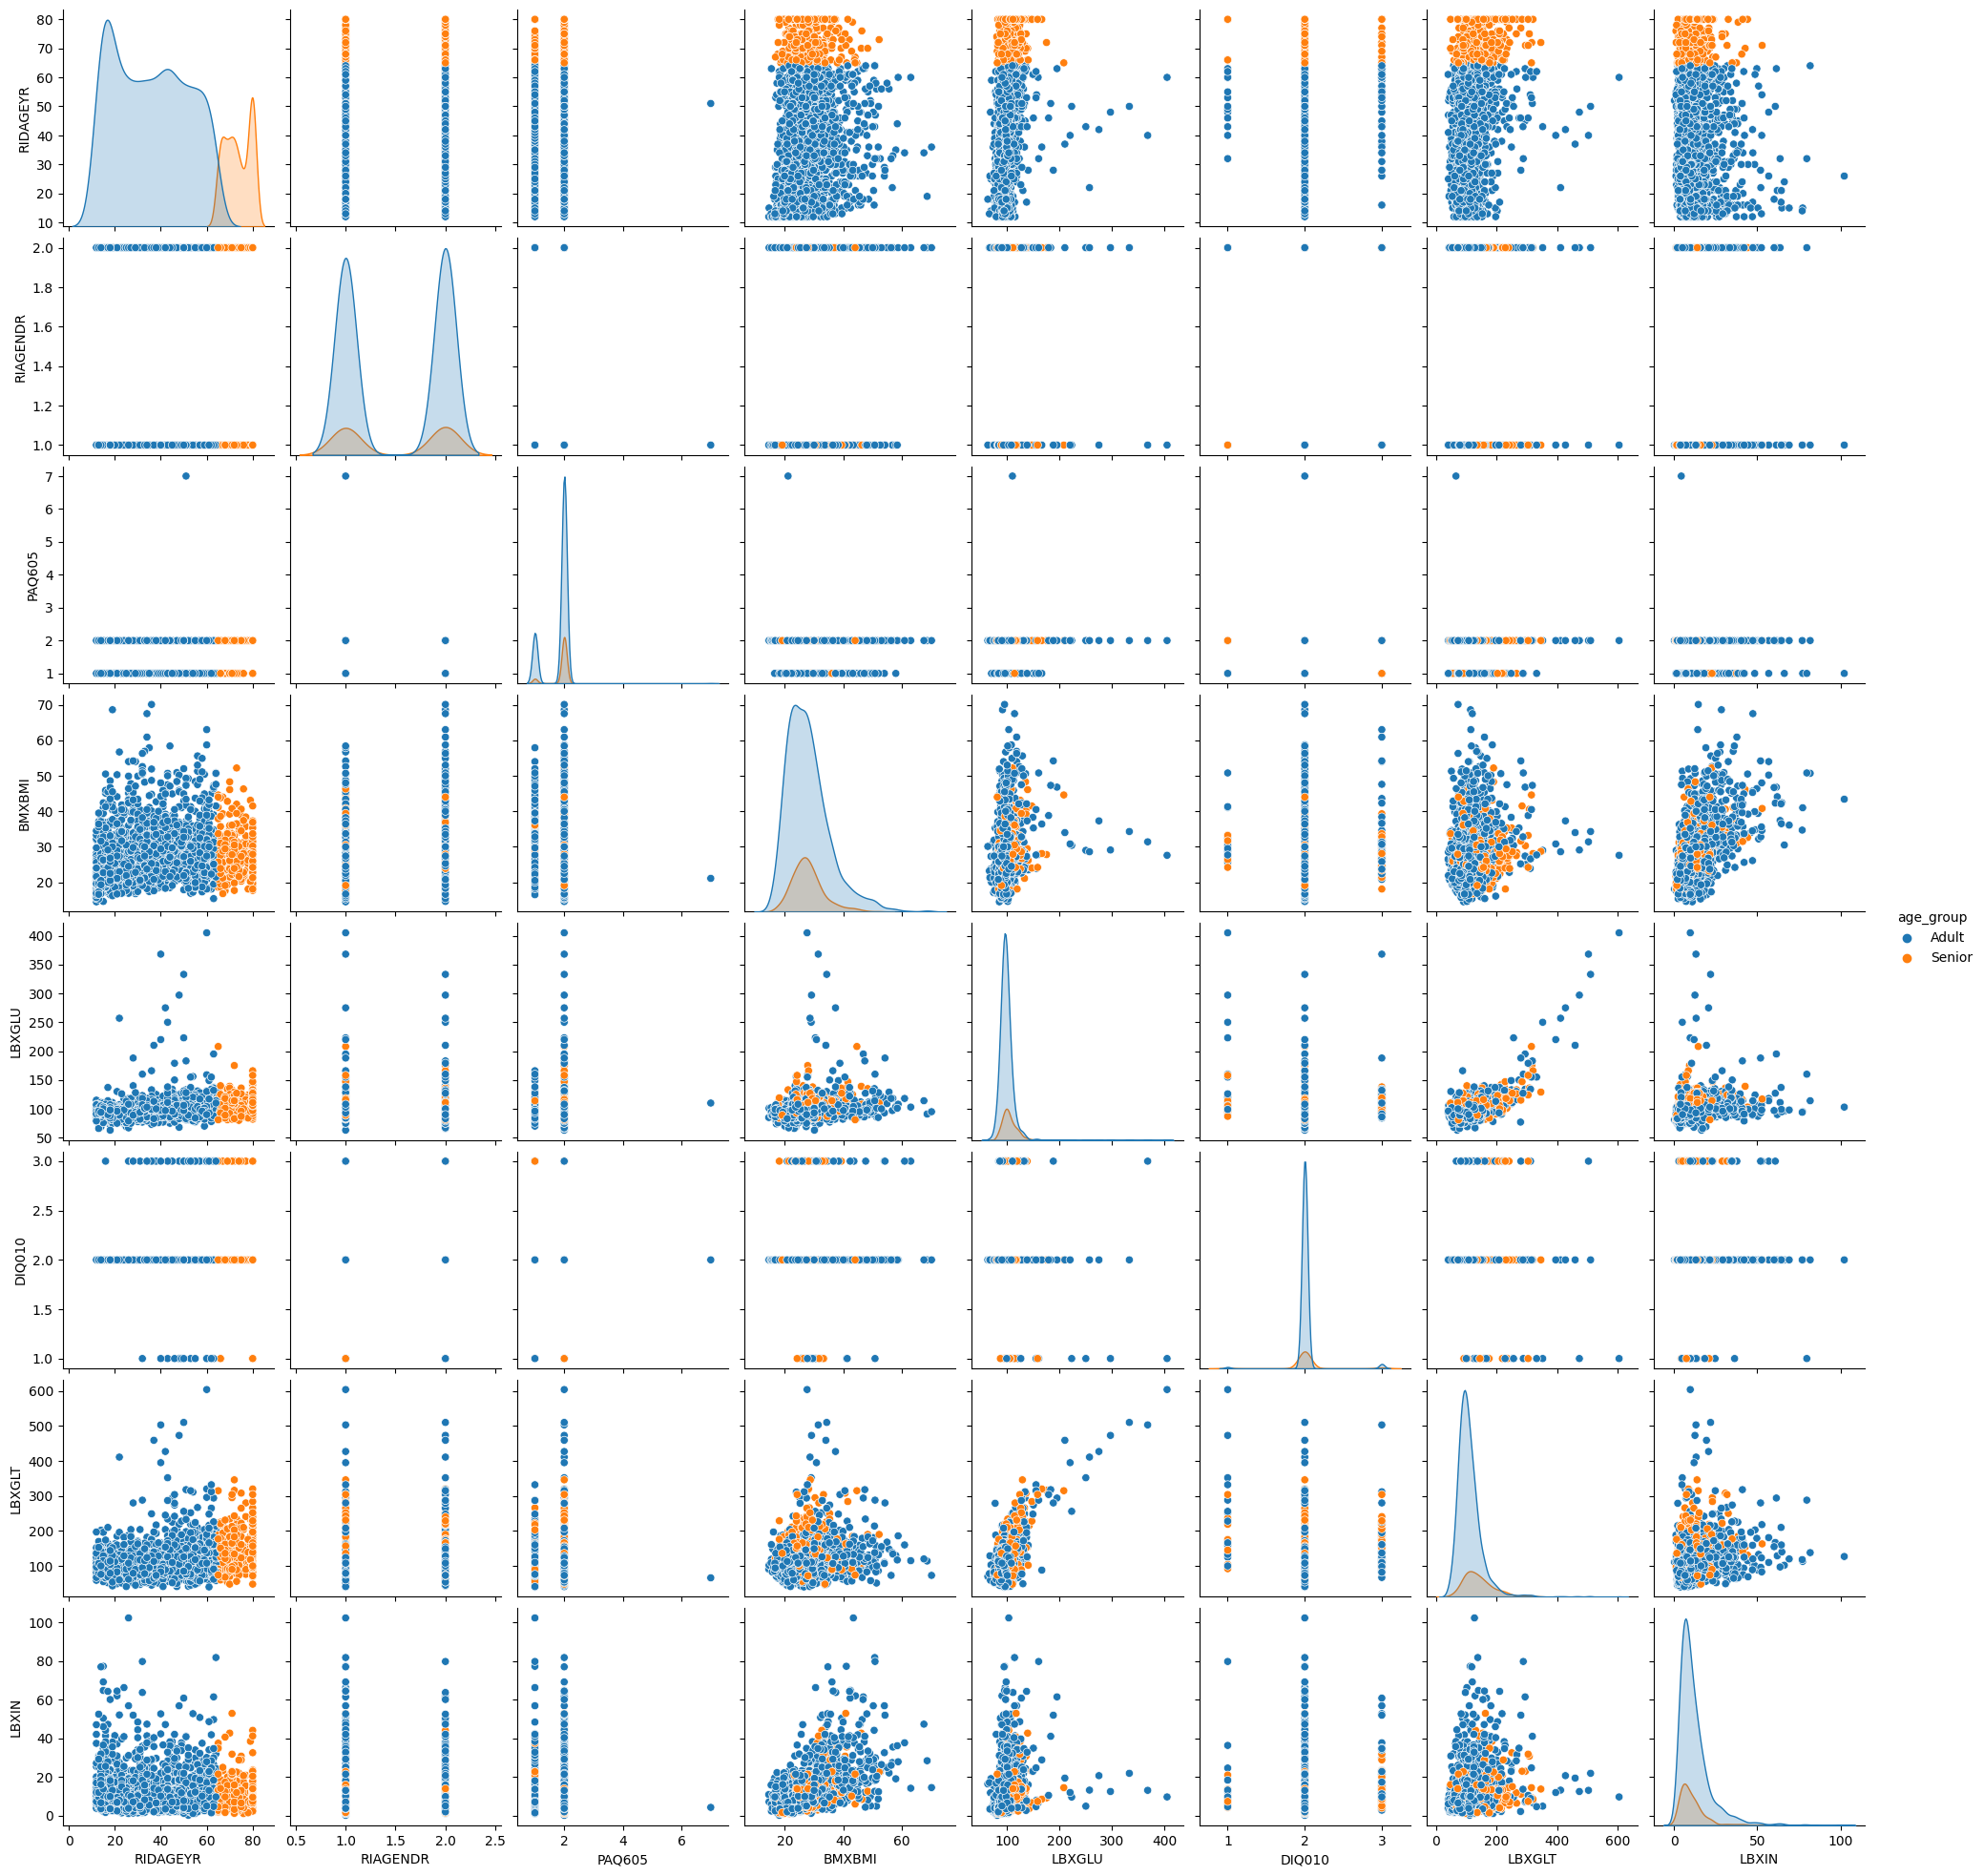

In [7]:
sns.pairplot(data, hue='age_group')

<ipython-input-34-835a1ff9690c>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True)


<Axes: >

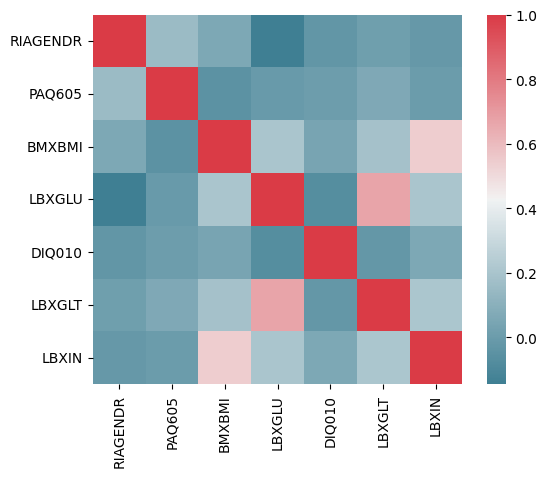

In [34]:
corr = X_train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True)

In [8]:
def evaluate_performance(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    mae = mean_absolute_error(y_true, y_pred)
    return {'MSE': mse, 'RMSE': rmse, 'MAE': mae}

In [9]:
X = data.drop(['age_group', 'RIDAGEYR'], axis=1)
y = data['RIDAGEYR']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

In [10]:
new_data = pd.DataFrame({
    'RIAGENDR': [1, 2, 1], # Gender 1-men, 2-women
    'PAQ605': [2, 1, 2], # Vigorous work activity 1-yes, 2-no, 7-refused
    'BMXBMI': [23.5, 27.1, 19.8], # Body Mass Index (kg/m**2)
    'LBXGLU': [90, 102, 80], # Glucose, plasma (mg/dL)
    'DIQ010': [2, 1, 2], # Diabetes 1-yes, 2-no, 3-borderline
    'LBXGLT': [110, 130, 95], # Two Hour Glucose(OGTT) (mg/dL)
    'LBXIN': [5.6, 6.8, 4.9] # Insulin (uU/mL)
})

In [31]:
# Linear regression model
model1 = LinearRegression()
model1.fit(X_train, y_train)

y_pred1 = model1.predict(X_test)
performance = evaluate_performance(y_test, y_pred1)
print(performance)

predicted_ages = model1.predict(new_data)
print(predicted_ages)

print("Training set score: {:.2f}".format(model1.score(X_train, y_train)))
print("Test set score: {:.2f}".format(model1.score(X_test, y_test)))

{'MSE': 340.84986494685126, 'RMSE': 18.462119730595706, 'MAE': 15.40375453731297}
[41.97774908 38.06252731 37.14216208]
Training set score: 0.18
Test set score: 0.13


In [68]:
# Gradient boosting model
model2 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=2023)
model2.fit(X_train, y_train)

y_pred2 = model2.predict(X_test)
performance = evaluate_performance(y_test, y_pred2)
print(performance)

predicted_ages = model2.predict(new_data)
print(predicted_ages)

print("Training set score: {:.2f}".format(model2.score(X_train, y_train)))
print("Test set score: {:.2f}".format(model2.score(X_test, y_test)))

{'MSE': 256.78121955277277, 'RMSE': 16.024394514388767, 'MAE': 12.781701439536468}
[40.71898947 64.40350558 22.02913395]
Training set score: 0.48
Test set score: 0.35


In [32]:
# Random forest model
model3 = RandomForestRegressor(n_estimators=100, random_state=2023)
model3.fit(X_train, y_train)

y_pred3 = model3.predict(X_test)
performance = evaluate_performance(y_test, y_pred3)
print(performance)

predicted_ages = model3.predict(new_data)
print(predicted_ages)


print("Training set score: {:.2f}".format(model3.score(X_train, y_train)))
print("Test set score: {:.2f}".format(model3.score(X_test, y_test)))

{'MSE': 267.22428004385966, 'RMSE': 16.346996055662938, 'MAE': 12.806951754385963}
[45.53 61.12 25.41]
Training set score: 0.90
Test set score: 0.32


In [75]:
# CatBoost model

model4 = CatBoostRegressor()
model4.fit(X_train, y_train)

y_pred4 = model3.predict(X_test)
performance = evaluate_performance(y_test, y_pred4)
print(performance)

predicted_ages = model3.predict(new_data)
print(predicted_ages)


print("Training set score: {:.2f}".format(model4.score(X_train, y_train)))
print("Test set score: {:.2f}".format(model4.score(X_test, y_test)))

Learning rate set to 0.045014
0:	learn: 20.0063235	total: 6.25ms	remaining: 6.24s
1:	learn: 19.8319081	total: 7.66ms	remaining: 3.82s
2:	learn: 19.6340722	total: 8.99ms	remaining: 2.99s
3:	learn: 19.4713980	total: 11.1ms	remaining: 2.76s
4:	learn: 19.2955153	total: 16.4ms	remaining: 3.27s
5:	learn: 19.1351394	total: 19.7ms	remaining: 3.26s
6:	learn: 18.9802127	total: 25.5ms	remaining: 3.62s
7:	learn: 18.8154506	total: 29.1ms	remaining: 3.61s
8:	learn: 18.6764080	total: 33.2ms	remaining: 3.66s
9:	learn: 18.5389273	total: 37.8ms	remaining: 3.74s
10:	learn: 18.4010540	total: 41.6ms	remaining: 3.74s
11:	learn: 18.2931449	total: 45.7ms	remaining: 3.76s
12:	learn: 18.1794719	total: 49.7ms	remaining: 3.77s
13:	learn: 18.0781710	total: 53.1ms	remaining: 3.74s
14:	learn: 17.9682740	total: 55.6ms	remaining: 3.65s
15:	learn: 17.8746736	total: 60.1ms	remaining: 3.69s
16:	learn: 17.7789682	total: 63.8ms	remaining: 3.69s
17:	learn: 17.6903167	total: 68.3ms	remaining: 3.72s
18:	learn: 17.6042866	tota

In [77]:
joblib.dump(model1, 'linear.pkl', compress=9)
joblib.dump(model2, 'gboost.pkl', compress=9)
joblib.dump(model4, 'catboost.pkl', compress=9)

['catboost.pkl']